### Use case 1:
Description:
We have given a dataset for you to understand Kmeans clustering algorithm and to
visualise how kmeans works.
Exercise 1 : Import the data and plot it using matplotlib and visualise the data. ( The data
is very much cleaned and you wont get such data in real life examples )
Exercise 2: Initialise three clusters to start k - means and plot the three cluster points
along with the previous data set.
Exercise 3: K-means algorithm iteratively performs these two steps:
• The first step assigns clusters to points by assigning them to the cluster with
nearest centriod.
• The second step calculates the new mean from the points belonging to the
cluster.
• Repeat these two steps till convergence.
• Visualise each step
Exercise 4 : Change number of clusters and see how plot is changing.

In [200]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [201]:
path = os.getcwd()

In [235]:
itrain = pd.read_excel(str(path)+'/Clustering_Clara.xlsx')

In [203]:
print(itrain.shape)
itrain.apply(lambda x: (len(x.unique()),[x.unique()]))

(3000, 2)


V1    (3000, [[2.072345, 17.93671, 1.083576, 11.1206...
V2    (3000, [[-3.241693, 15.78481, 7.319176, 14.406...
dtype: object

In [204]:
itrain.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ca8d87ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ca8cd6ba8>]], dtype=object)

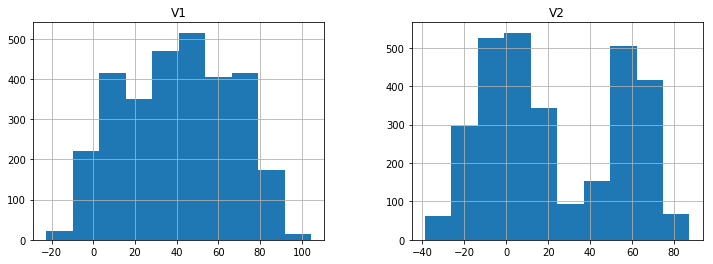

In [205]:
itrain.hist(figsize = (12,4))

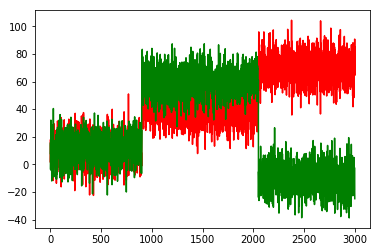

In [206]:
itrain['V1'].plot(c='r')
itrain['V2'].plot(c = 'g')

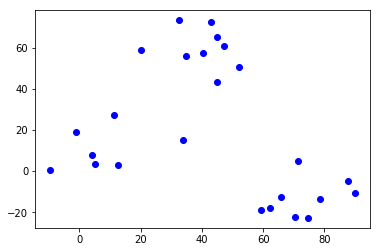

In [248]:
rc = itrain.sample(25, random_state = 0)
#plt.scatter(data = itrain, x = 'V1', y = 'V2',marker='o')
plt.scatter(data = rc, x = 'V1', y = 'V2',marker='o', c = 'b')

,V1,V2,distance_from_572,distance_from_1675,distance_from_2859,closest,color,distance_from_2591,distance_from_462,distance_from_1588
312,12.48016,2.728922,11.321243,65.280733,58.878039,462,r,75.596133,22.046848,56.833331
1026,40.50345,57.222310,51.627682,4.187194,73.538574,1588,g,78.093825,75.487054,20.349196
1588,20.23477,59.030730,45.696637,21.097870,85.197005,1588,g,93.006428,65.508152,0.000000
2942,59.33881,-18.745310,57.425575,82.122841,13.623225,2591,b,31.492259,71.486211,87.053078
2981,74.68241,-22.742850,72.511647,90.512003,13.438980,2591,b,21.983826,87.339468,98.241864


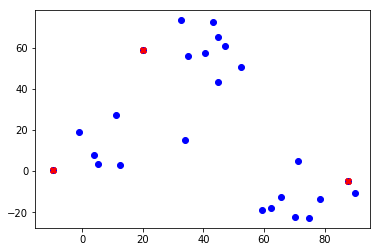

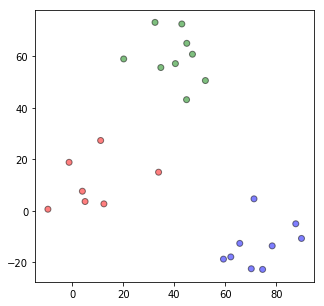

In [252]:
cc = rc.sample(3, random_state = 5)
plt.scatter(data = rc, x = 'V1', y = 'V2',marker='o', c = 'b')
plt.scatter(data = cc, x = 'V1', y = 'V2',marker='X', c = 'r')

df1 = assignment(rc,cc)
display(df1.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['V1'], df1['V2'], c = df1['color'], alpha=0.5, edgecolor='k')
plt.show()

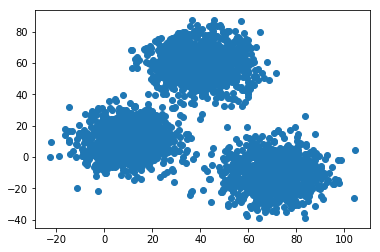

In [207]:
plt.scatter(data = itrain, x = 'V1', y = 'V2',marker='o')

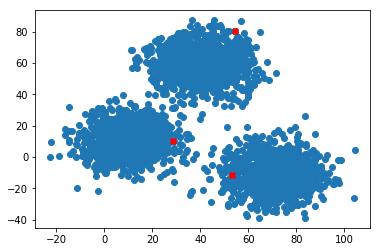

In [236]:
rc = itrain.sample(3, random_state = 4)
plt.scatter(data = itrain, x = 'V1', y = 'V2',marker='o')
plt.scatter(data = rc, x = 'V1', y = 'V2',marker='X', c = 'r')

In [237]:
print(rc.iloc[0])
print(rc.iloc[0][1])
centroids = rc.copy()
centroids

V1    28.50490
V2    10.30336
Name: 572, dtype: float64
10.30336


,V1,V2
572,28.50490,10.30336
1675,54.38664,80.36837
2859,53.24852,-11.41788


In [251]:
## Assignment Stage


#colmap = {572: 'r', 1675: 'g', 2859: 'b'}

def assignment(df, centroids):
    
    for i in centroids.index:
        
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['V1'] - centroids.loc[i][0]) ** 2
                + (df['V2'] - centroids.loc[i][1]) ** 2
            )
        )
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.index]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    #df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

,V1,V2,distance_from_572,distance_from_1675,distance_from_2859,closest,color
1,2.072345,-3.241693,29.700984,98.627725,51.825196,572,r
2,17.936710,15.784810,11.905164,74.159515,44.574772,572,r
3,1.083576,7.319176,27.583226,90.428985,55.427959,572,r
4,11.120670,14.406780,17.861957,78.885205,49.413245,572,r
5,23.711550,2.557729,9.108842,83.638849,32.676448,572,r


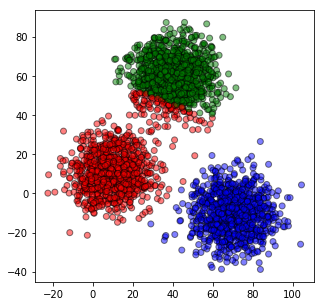

In [239]:
df1 = assignment(itrain,centroids)
display(df1.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df1['V1'], df1['V2'], c = df1['color'], alpha=0.5, edgecolor='k')
plt.show()

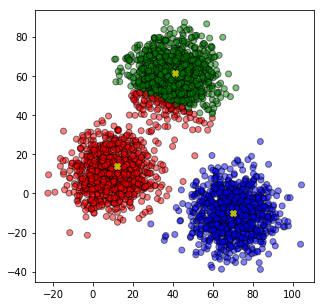

In [240]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.index:
        centroids.loc[i][0] = np.mean(df1[df1['closest'] == i]['V1'])
        centroids.loc[i][1] = np.mean(df1[df1['closest'] == i]['V2'])
    return k

centroids = update(centroids)

for i in old_centroids.index:
    old_x = old_centroids.loc[i][0]
    old_y = old_centroids.loc[i][1]
    dx = (centroids.loc[i][0] - old_centroids.loc[i][0]) * 0.75
    dy = (centroids.loc[i][1] - old_centroids.loc[i][1]) * 0.75

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df1['V1'], df1['V2'], color=df1['color'], alpha=0.5, edgecolor='k')
plt.scatter(data = centroids, x = 'V1', y = 'V2',marker='X', c = 'y')
#ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [241]:
centroids

,V1,V2
572,12.196617,14.046613
1675,41.204735,61.350360
2859,69.927146,-10.173298


,V1,V2,distance_from_572,distance_from_1675,distance_from_2859,closest,color
1,2.072345,-3.241693,20.034630,75.521369,68.207926,572,r
2,17.936710,15.784810,5.997499,51.162685,58.110488,572,r
3,1.083576,7.319176,12.990692,67.298412,71.031146,572,r
4,11.120670,14.406780,1.134628,55.756171,63.736817,572,r
5,23.711550,2.557729,16.266166,61.339913,47.937046,572,r


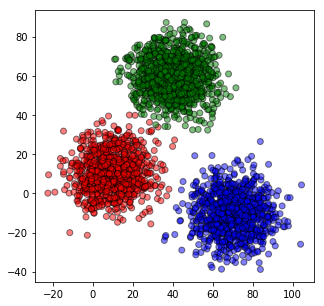

In [242]:
df2 = assignment(itrain,centroids)
display(df2.head())
fig = plt.figure(figsize=(5, 5))
plt.scatter(df2['V1'], df2['V2'], c = df2['color'], alpha=0.5, edgecolor='k')
plt.show()

In [243]:
display(rc)
centroids

,V1,V2
572,28.50490,10.30336
1675,54.38664,80.36837
2859,53.24852,-11.41788


,V1,V2
572,12.196617,14.046613
1675,41.204735,61.350360
2859,69.927146,-10.173298


### k-means using Scikit Learn

Cluster centroids: [[ 26.97904841  38.42510047]
 [ 69.49144971 -10.10803707]]


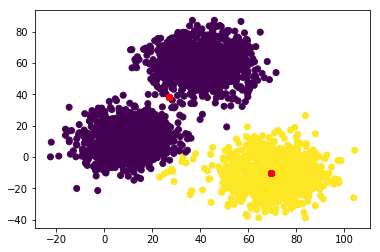

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(itrain)
clu = kmeans.labels_
clc = kmeans.cluster_centers_
clc_x = []
clc_y = []
for i in clu:
    clc_x.append(clc[i][0])
    clc_y.append(clc[i][1])
    
print('Cluster centroids:', clc)
plt.scatter(x = itrain['V1'], y = itrain['V2'], c = clu)
plt.scatter(x = clc_x, y = clc_y, c = 'r')

Cluster centroids: [[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


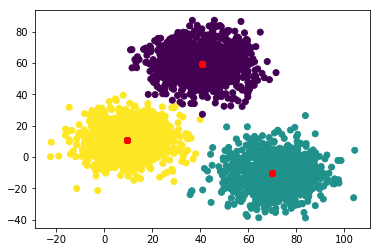

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(itrain)
clu = kmeans.labels_
clc = kmeans.cluster_centers_
clc_x = []
clc_y = []
for i in clu:
    clc_x.append(clc[i][0])
    clc_y.append(clc[i][1])
    
print('Cluster centroids:', clc)
plt.scatter(x = itrain['V1'], y = itrain['V2'], c = clu)
plt.scatter(x = clc_x, y = clc_y, c = 'r')

Cluster centroids: [[ 31.71773206  59.94879248]
 [ 69.92418447 -10.11964119]
 [  9.45577774  10.66209744]
 [ 48.06625805  59.47997765]]


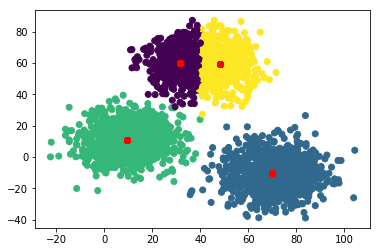

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1).fit(itrain)
clu = kmeans.labels_
clc = kmeans.cluster_centers_
clc_x = []
clc_y = []
for i in clu:
    clc_x.append(clc[i][0])
    clc_y.append(clc[i][1])
    
print('Cluster centroids:', clc)
plt.scatter(x = itrain['V1'], y = itrain['V2'], c = clu)
plt.scatter(x = clc_x, y = clc_y, c = 'r')